<h1>Tutorial of using shapely value for  evaluating the inputs of DeepDNA4mC</h1>

This notebook is provided to show the usage of shaps for input feature evaluation.

NOTE: The script used 3rd module <a href=https://github.com/slundberg/shap>shap</a> for layer plotting.

<h2>1. Preparation</h2>

In this notebook, few packages are necessary. 

Assuming that we are in <b>'root-of-autoBioSeqpy/notebook'</b>, then we need to add the search path and import the modules.

Please install <b>shap, matplotlib, tensorFlow and keras</b> before using this notebook.

In [1]:
import os, sys
sys.path.append('../tool/libs')
sys.path.append('../')
oriPath = os.path.curdir
import paraParser
import moduleRead
import dataProcess
#import analysisPlot
import numpy as np
#from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score,confusion_matrix,matthews_corrcoef 
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior() 
from utils import TextDecorate, evalStrList
# from keras.models import Model
# from keras.models import Sequential

# import umap
# import umap.plot
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages
currPath = os.getcwd()

Using TensorFlow backend.
C:\Users\msi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\msi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\msi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\msi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Fu

In [2]:
import viz_sequence

Using <a href=https://github.com/slundberg/shap>shap</a> is a simple way for feature evaluation, but still we need the model as well as the data for calcuating the shapely values. Thus, here we need few steps to get a built model and the related data.

<h3>1.1 Model building</h3>

Like the binary case, using running.py  could build a model:

<b>python running.py --dataType dna --dataEncodingType onehot --dataTrainFilePaths examples/DeepDNA4mC/data/C.elegans_P.txt examples/DeepDNA4mC/data/C.elegans_N.txt --dataTrainLabel 1 0 --dataSplitScale 0.9 --modelLoadFile examples/DeepDNA4mC/model/CNN-RNN.py --verbose 1 --outSaveFolderPath tmpOut --savePrediction 1 --saveFig 1 --batch_size 64 --epochs 20 --shuffleDataTrain 1 --spcLen 41 --modelSaveName tmpMod.json --weightSaveName tmpWeight.bin --noGPU 0 --paraSaveName parameters.txt
</b>

The outputs will be saved at <b>../tmpOut</b>, including the parameters, the path of the data and constructure of the model.

If users would like to use their own model, please don't forget to save the model and the weight by using parameters "--modelSaveName" and "--weightSaveName".

<h3>1.2 Parameter pasering and data loading</h3>
The parameters are saved in <b>../tmoOut/parameters.txt</b>, we can get the information easily by using the <b>paraParser</b> module.

In [3]:
paraFile = currPath+'/../tmpOut/parameters.txt'
paraDict = paraParser.parseParametersFromFile(paraFile)
#print
for k in paraDict:
    print('%r: %r' %(k,paraDict[k]))

'dataType': ['dna']
'dataEncodingType': ['onehot']
'spcLen': [11]
'firstKernelSize': []
'dataTrainFilePaths': ['examples/TF/data/positive.txt', 'examples/TF/data/negative.txt']
'dataTrainLabel': [1, 0]
'dataTestFilePaths': []
'dataTestLabel': []
'dataTrainModelInd': []
'dataTestModelInd': []
'outSaveFolderPath': 'tmpOut'
'showFig': True
'saveFig': True
'figDPI': 300
'savePrediction': True
'dataSplitScale': 0.9
'modelLoadFile': ['examples/TF/model/CNN1.py']
'weightLoadFile': []
'shuffleDataTrain': True
'shuffleDataTest': False
'batch_size': 50
'epochs': 40
'useKMer': []
'KMerNum': []
'inputLength': []
'loss': 'binary_crossentropy'
'optimizer': 'optimizers.Adam()'
'metrics': ['acc', 'acc']
'modelSaveName': 'tmpMod.json'
'weightSaveName': 'tmpWeight.bin'
'noGPU': False
'paraFile': None
'paraSaveName': 'parameters.txt'
'seed': 1
'labelToMat': False
'colorText': 'Auto'
'verbose': True
'reshapeSize': []


Then using <b>predicting</b> module could help us get the model and the datasets.

In [4]:
import predicting

Here we need some modification to specify the dataset due to the layer plotting needs the training dataset.

In [5]:
paraDict['dataTestFilePaths'] = paraDict['dataTrainFilePaths']
paraDict['dataTestModelInd'] = paraDict['dataTrainModelInd']
paraDict['dataTestLabel'] = paraDict['dataTrainLabel']

In [6]:
os.chdir(currPath+'/../')#to the root path of autoBioSeqpy

In [7]:
predictedLabel,predicted_Probability,testNameLists,testDataMats,testLabelArr,model = predicting.predict(paraDict)    




Enconding DNA data for model 0 ...
Checking the number of test files, which should be larger than 1 (e.g. at least two labels)...
Begin to generate test dataset...
Test datasets generated.
begin to prepare model...
Checking module file for modeling
Loading module and weight file
Building model...

Module loaded, generating the summary of the module
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 11, 4)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 250)           2250      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 250)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 250)            0         
______________________________

Generating the data and labels using the autoBioSeqpy frame... Acturally users can generate the data and labels in their own way.

In [8]:
featureGenerators = []
dataTypeList = paraDict['dataType']
verbose = False
dataEncodingType = paraDict['dataEncodingType']
KMerNumList = useKMerList = [False] * 400
dataTestFilePaths = paraDict['dataTestFilePaths']
modelLoadFile = paraDict['modelLoadFile']
dataTestModelInd = paraDict['dataTestModelInd']
dataTestModelInd = [0] * len(dataTestFilePaths)
spcLen = paraDict['spcLen']
for i,subDataType in enumerate(dataTypeList):
    if subDataType.lower() == 'protein':
        if verbose:
            td.printC('Enconding protein data for model %d ...' %i,'b')
        featureGenerator = dataProcess.ProteinFeatureGenerator(dataEncodingType[i], useKMer=useKMerList[i], KMerNum=KMerNumList[i])
    elif subDataType.lower() == 'dna':
        if verbose:
            td.printC('Enconding DNA data for model %d ...' %i,'b')
        featureGenerator = dataProcess.DNAFeatureGenerator(dataEncodingType[i], useKMer=useKMerList[i], KMerNum=KMerNumList[i])
    elif subDataType.lower() == 'rna':
        if verbose:
            td.printC('Enconding RNA data for model %d ...' %i,'b')
        featureGenerator = dataProcess.RNAFeatureGenerator(dataEncodingType[i], useKMer=useKMerList[i], KMerNum=KMerNumList[i])
    elif subDataType.lower() == 'other':
        if verbose:
            td.printC('Reading CSV-like data for model %d ...' %i,'b')
        featureGenerator = dataProcess.OtherFeatureGenerator()
    else:
        td.printC('Unknow dataType %r, please use \'protein\', \'dna\' ,\'rna\' or \'other\'' %subDataType, 'r')
    featureGenerators.append(featureGenerator)
    assert subDataType.lower() in ['protein','dna','rna','other']

if verbose:
    td.printC('Checking the number of test files, which should be larger than 1 (e.g. at least two labels)...','b')
assert len(dataTestFilePaths) > 0

if verbose:
    td.printC('Begin to generate test dataset...','b')

testDataLoadDict = {}    
for modelIndex in range(len(modelLoadFile)):
    testDataLoadDict[modelIndex] = []
#    testDataLoaders = []
for i,dataPath in enumerate(dataTestFilePaths):
    modelIndex = dataTestModelInd[i]
    featureGenerator = featureGenerators[modelIndex]
    dataLoader = dataProcess.DataLoader(label = paraDict['dataTestLabel'][i], featureGenerator=featureGenerator)
    dataLoader.readFile(dataPath, spcLen = spcLen[modelIndex])
    testDataLoadDict[modelIndex].append(dataLoader)

testDataMats = []
testLabelArrs = []
testNameLists = []
for modelIndex in range(len(modelLoadFile)):
    testDataLoaders = testDataLoadDict[modelIndex]
    testDataSetCreator = dataProcess.DataSetCreator(testDataLoaders)
    testDataMat, testLabelArr, nameList = testDataSetCreator.getDataSet(toShuffle=False, withNameList=True)
    testDataMats.append(testDataMat)
    testLabelArrs.append(testLabelArr)
    testNameLists.append(nameList)
if verbose:
    td.printC('Test datasets generated.','g')
nameTemp = testNameLists[0]    
testDataMats, testLabelArrs, sortedIndexes = dataProcess.matAlignByName(testDataMats,nameTemp,testLabelArrs,testNameLists)
testNameLists = [nameTemp] * len(testNameLists)

tmpTempLabel = testLabelArrs[0]

Few printing operations for display the current information.

In [9]:
testLabelArr.shape

(1938,)

In [10]:
print('%d matrix generated:\n' %(len(testDataMats)))
for i in range(len(testDataMats)):
    print('Matrix and label %d:' %i)
    print(testDataMats[i])
    print(testLabelArrs[i])
    print('\n')

1 matrix generated:

Matrix and label 0:
[[0 0 1 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 0 1]]
[1 1 1 ... 0 0 0]




<h2>2 Using shap for evaluating the features</h2>
<h3>2.1 Generating the shapely values using shap</h3>
Shap is well wrappered for using. Below are the codes for using shap to evaluate the inputs.

In [11]:
import matplotlib.pyplot as plt

In [12]:
import shap

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 11, 4)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 250)           2250      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 250)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 250)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1250)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 650)               813150    
_________________________________________________________________
dropout_2 (Dropout)          (None, 650)              

In [14]:
from keras import backend as K
session = K.get_session()

In [15]:
explainer = shap.GradientExplainer(model, testDataMats[0][:,:],session=session)

In [16]:
shap_values = explainer.shap_values(testDataMats[0][:,:])

In [17]:
shap_values

[array([[ 0.00690736,  0.00224359,  0.00763718, ...,  0.00049168,
         -0.00279776,  0.00105831],
        [ 0.01091778,  0.00132743,  0.01139755, ...,  0.00593973,
         -0.00500849, -0.00015362],
        [ 0.00990327,  0.00311586,  0.01316251, ...,  0.00076228,
          0.00053849,  0.00523415],
        ...,
        [ 0.02493471, -0.00092536,  0.02190001, ..., -0.0293096 ,
         -0.00655607, -0.00242932],
        [ 0.0140949 , -0.01782874, -0.00774243, ...,  0.00425934,
          0.00706754,  0.00172843],
        [ 0.01352394,  0.00280677,  0.00324531, ..., -0.00080363,
         -0.00410918, -0.0060565 ]])]

Some information of the shapely values

In [18]:
shap_values[0].shape


(1938, 44)

In [19]:
testDataMats[0].shape

(1938, 44)

In [20]:
testDataLoadDict[0][1].names

['negative.txt_hG38_Chr1:1059717-1059727(-)###shuffled171',
 'negative.txt_hG38_Chr1:2843977-2843987(+)###shuffled16',
 'negative.txt_hG38_Chr1:9129667-9129677(+)###shuffled9',
 'negative.txt_hG38_Chr1:9300285-9300295(-)###shuffled18',
 'negative.txt_hG38_Chr1:9300315-9300325(+)###shuffled3',
 'negative.txt_hG38_Chr1:15284748-15284758(-)###shuffled38',
 'negative.txt_hG38_Chr1:15284782-15284792(-)###shuffled2',
 'negative.txt_hG38_Chr1:15352297-15352307(-)###shuffled46',
 'negative.txt_hG38_Chr1:16217595-16217605(+)###shuffled16',
 'negative.txt_hG38_Chr1:17403291-17403301(+)###shuffled34',
 'negative.txt_hG38_Chr1:17441658-17441668(+)###shuffled5',
 'negative.txt_hG38_Chr1:21324815-21324825(-)###shuffled4',
 'negative.txt_hG38_Chr1:21614876-21614886(+)###shuffled97',
 'negative.txt_hG38_Chr1:21627045-21627055(+)###shuffled32',
 'negative.txt_hG38_Chr1:21627080-21627090(-)###shuffled48',
 'negative.txt_hG38_Chr1:21627099-21627109(+)###shuffled70',
 'negative.txt_hG38_Chr1:21956793-2195

In [21]:
print(len(testDataLoadDict[0][0].names))
print(len(testDataLoadDict[0][1].names))

969
969


<h3>2.2 Plotting the shapely values</h3> 
Shapely values can be regard as the contribution of the features, thus the absolute value is available for comparison. Below is a homemade class for plotting the importance of features.

In [22]:
dataLoaders = testDataLoadDict[0]

In [23]:
class seqWithShaps:
    def __init__(self,seqStr,shapVals,plotFea=None):
        self.seqStr = seqStr
        self.shapVals = shapVals
        if not plotFea is None:
            self.plotFea = plotFea
        else:
            self.plotFea = {}
            self.plotFea['color'] = {'A':'green','T':'red','C':'blue','G':'orange'}
            self.plotFea['method'] = {'A':viz_sequence.plot_a,'T':viz_sequence.plot_t,'C':viz_sequence.plot_c,'G':viz_sequence.plot_g}
            self.plotFea['figSize'] = (16,12)
        if len(self.seqStr) > len(self.shapVals):
            print()
            
    def plot(self):
        seqStr = self.seqStr.upper()
        fig, ax = plt.subplots(figsize=self.plotFea['figSize'])
        for i,s in enumerate(seqStr):
            base = 0
            left_edge = i + 0.5
            height = self.shapVals[i]
            color = self.plotFea['color'][s]
            plotMethod = self.plotFea['method'][s]
            plotMethod(ax,base,left_edge,height,color)
        ax.set_xlim((0,len(self.shapVals)))
        ax.set_ylim((np.min(self.shapVals),np.max(self.shapVals)))
        plt.show()
    

In [24]:
tmpObj = seqWithShaps(dataLoaders[0].seqs[dataLoaders[0].names[0]],shap_values[0][0,:].reshape(11,4).sum(axis=1))

Some information for displaying...

In [25]:
len(dataLoaders[0].seqs[dataLoaders[0].names[0]])

11

In [26]:
shap_values[0][0,:].shape

(44,)

Plotting...

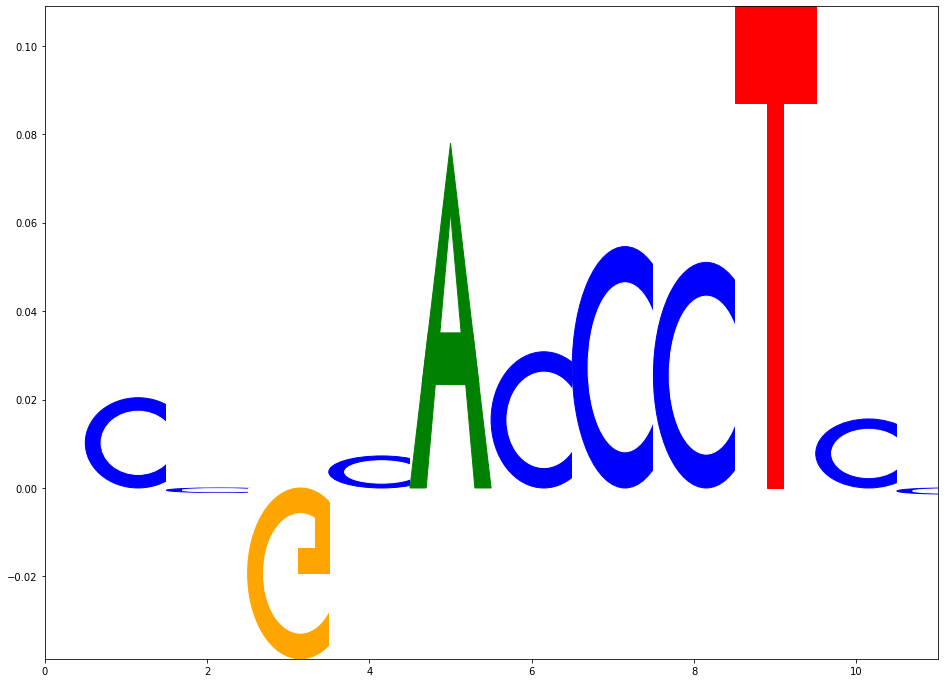

In [27]:
tmpObj.plot()

The figure above is the plot pointing the base with the highest absolute shapely value in every position. Below is a detailed calss for more function.The simple usage is listed below the class cell.

In [28]:
class seqMatWithShaps:
    def __init__(self,plotFea=None):
        self.seqStrList = []
        self.posValDict = {}
        if not plotFea is None:
            self.plotFea = plotFea
        else:
            self.plotFea = {}
            self.plotFea['color'] = {'A':'green','T':'red','C':'blue','G':'orange'}
            self.plotFea['method'] = {'A':viz_sequence.plot_a,'T':viz_sequence.plot_t,'C':viz_sequence.plot_c,'G':viz_sequence.plot_g}
            self.plotFea['figSize'] = (16,9)
    
    def fillDict(self,seqStr,shapVals,valPreprocessMethod = None):
        for i,s in enumerate(seqStr):
            shapVal = shapVals[i]
            if not valPreprocessMethod is None:
                shapVal = valPreprocessMethod(shapVal)
            if not i in self.posValDict:
                self.posValDict[i] = {}
            if not s in self.posValDict[i]:
                self.posValDict[i][s] = shapVal
            else:
                self.posValDict[i][s] += shapVal
    
    def plot(self, valThres = None):
        fig, ax = plt.subplots(figsize=self.plotFea['figSize'])
        yLimMin = 1e10
        yLimMax = -1e10
        for i in self.posValDict:
            keyList = []
            valList = []
            for k in self.posValDict[i]:
                keyList.append(k)
                valList.append(self.posValDict[i][k])
            sortIndex = np.argsort(np.abs(valList))
#             print(np.array(valList)[sortIndex])
            baseNeg = 0
            basePos = 0
            for pos in sortIndex:
                s = keyList[pos]                
                left_edge = i + 0.5
                height = valList[pos]
                if np.abs(height) < valThres:
                    continue
                if not s in self.plotFea['color']:
                    continue
                color = self.plotFea['color'][s]
                plotMethod = self.plotFea['method'][s]
                if height >= 0:
                    base = basePos
                    basePos += height
                else:
                    base = baseNeg
                    baseNeg = baseNeg + height
                plotMethod(ax,base,left_edge,height,color)
                
                
            yLimMin = np.min((yLimMin,np.min(valList)))
            yLimMax = np.max((yLimMax,np.max(valList)))
        ax.set_xlim((0,len(self.posValDict.keys()) + 2 ))
        ax.set_ylim((yLimMin-1,yLimMax+1))
        plt.show()
        
    def plot_max(self, valThres = None):
        fig, ax = plt.subplots(figsize=self.plotFea['figSize'])
        yLimMin = 1e10
        yLimMax = -1e10
        for i in self.posValDict:
            keyList = []
            valList = []
            for k in self.posValDict[i]:
                keyList.append(k)
                valList.append(self.posValDict[i][k])
            sortIndex = np.argsort(np.abs(valList))
#             print(np.array(valList)[sortIndex])
            baseNeg = 0
            basePos = 0
            bestPos = None
            bestH = None
            for pos in sortIndex:
                s = keyList[pos]                
                left_edge = i + 0.5
                height = valList[pos]
                if bestH is None:
                    bestH = height
                    bestPos = pos
                else:
                    if np.abs(height) > np.abs(bestH):
                        bestH = height
                        bestPos = pos
            for pos in [bestPos]:
                s = keyList[pos]                
                left_edge = i + 0.5
                height = valList[pos]
                if np.abs(height) < valThres:
                    continue
                if not s in self.plotFea['color']:
                    continue
                color = self.plotFea['color'][s]
                plotMethod = self.plotFea['method'][s]
                if height >= 0:
                    base = basePos
                    basePos += height
                else:
                    base = baseNeg
                    baseNeg = baseNeg + height
                plotMethod(ax,base,left_edge,height,color)
                
                
            yLimMin = np.min((yLimMin,np.min(valList)))
            yLimMax = np.max((yLimMax,np.max(valList)))
        ax.set_xlim((0,len(self.posValDict.keys()) + 2 ))
        ax.set_ylim((yLimMin-1,yLimMax+1))
        plt.show()

In [29]:
tmpObjPos = seqMatWithShaps()
tmpObjNeg = seqMatWithShaps()

In [30]:
i = 0
for name in dataLoaders[0].names:
    seqStr = dataLoaders[0].seqs[name]
    tmpVals = shap_values[0][i,:]
    tmpObjPos.fillDict(seqStr,tmpVals)
    i += 1
for name in dataLoaders[1].names:
    seqStr = dataLoaders[1].seqs[name]
    tmpVals = shap_values[0][i,:]
    tmpObjNeg.fillDict(seqStr,tmpVals)
    i += 1

The two cells above is the code for preparing, below are few plotting operations.Note that the parameter <b>valThres</b> is the threshold for filtering the base with small absolute shapely values. 

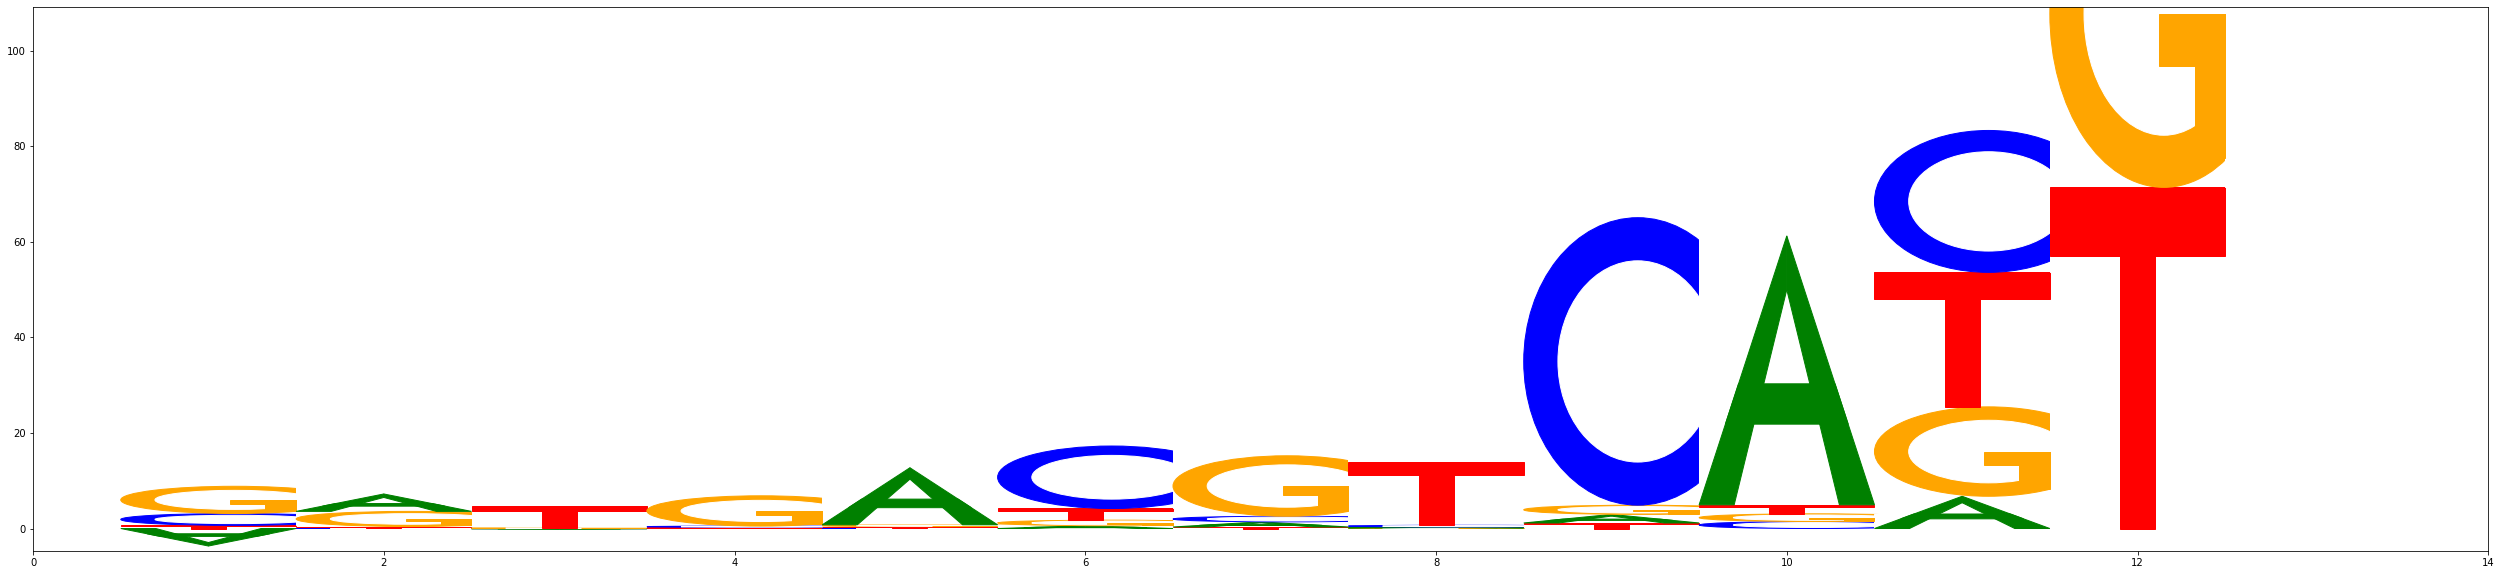

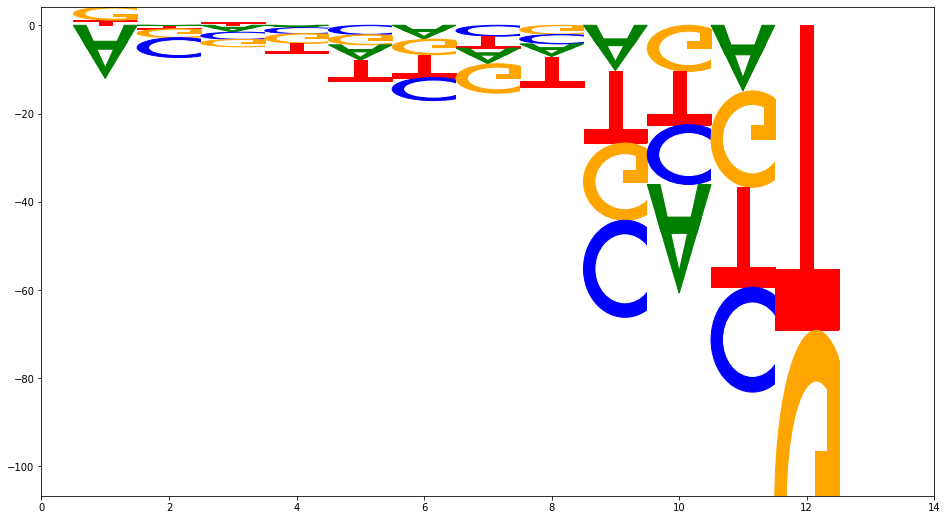

In [34]:
tmpObjPos.plot(valThres=0.02)
tmpObjNeg.plot(valThres=0.02)

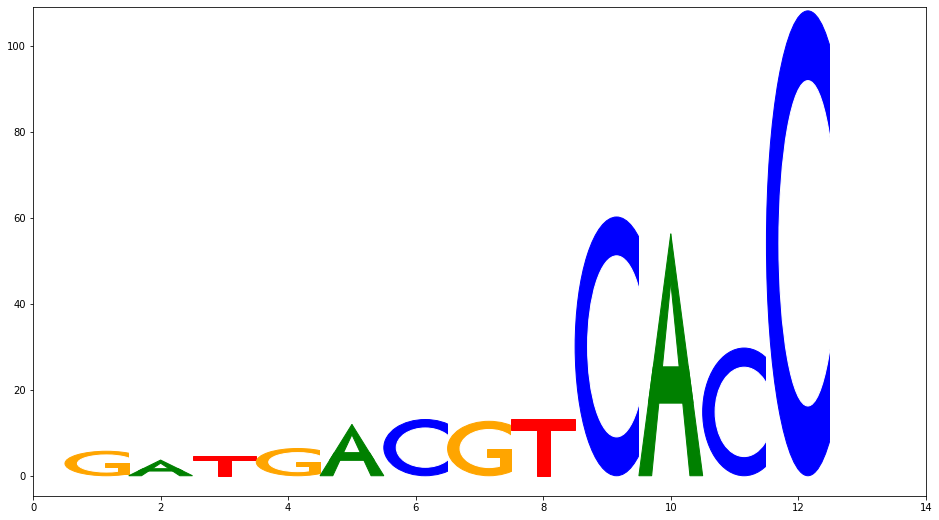

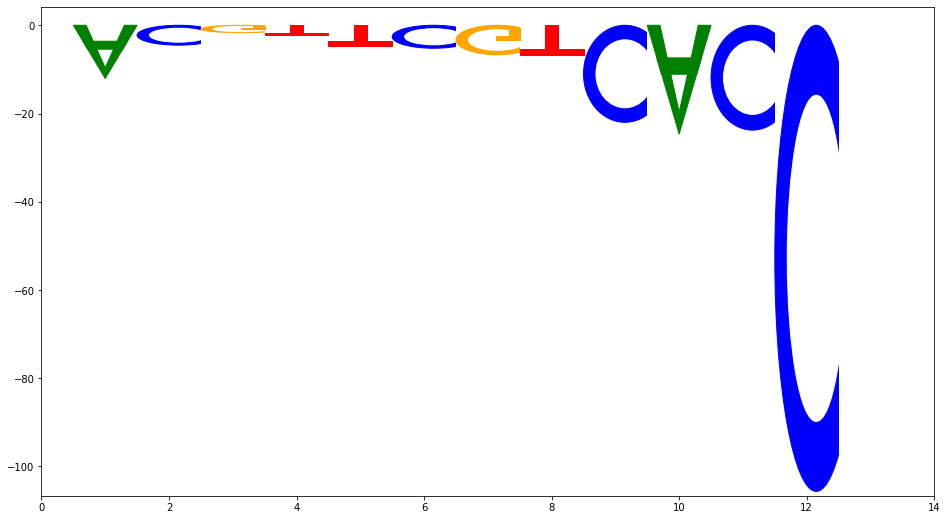

In [32]:
tmpObjPos.plot_max(valThres=0.0)
tmpObjNeg.plot_max(valThres=0.0)

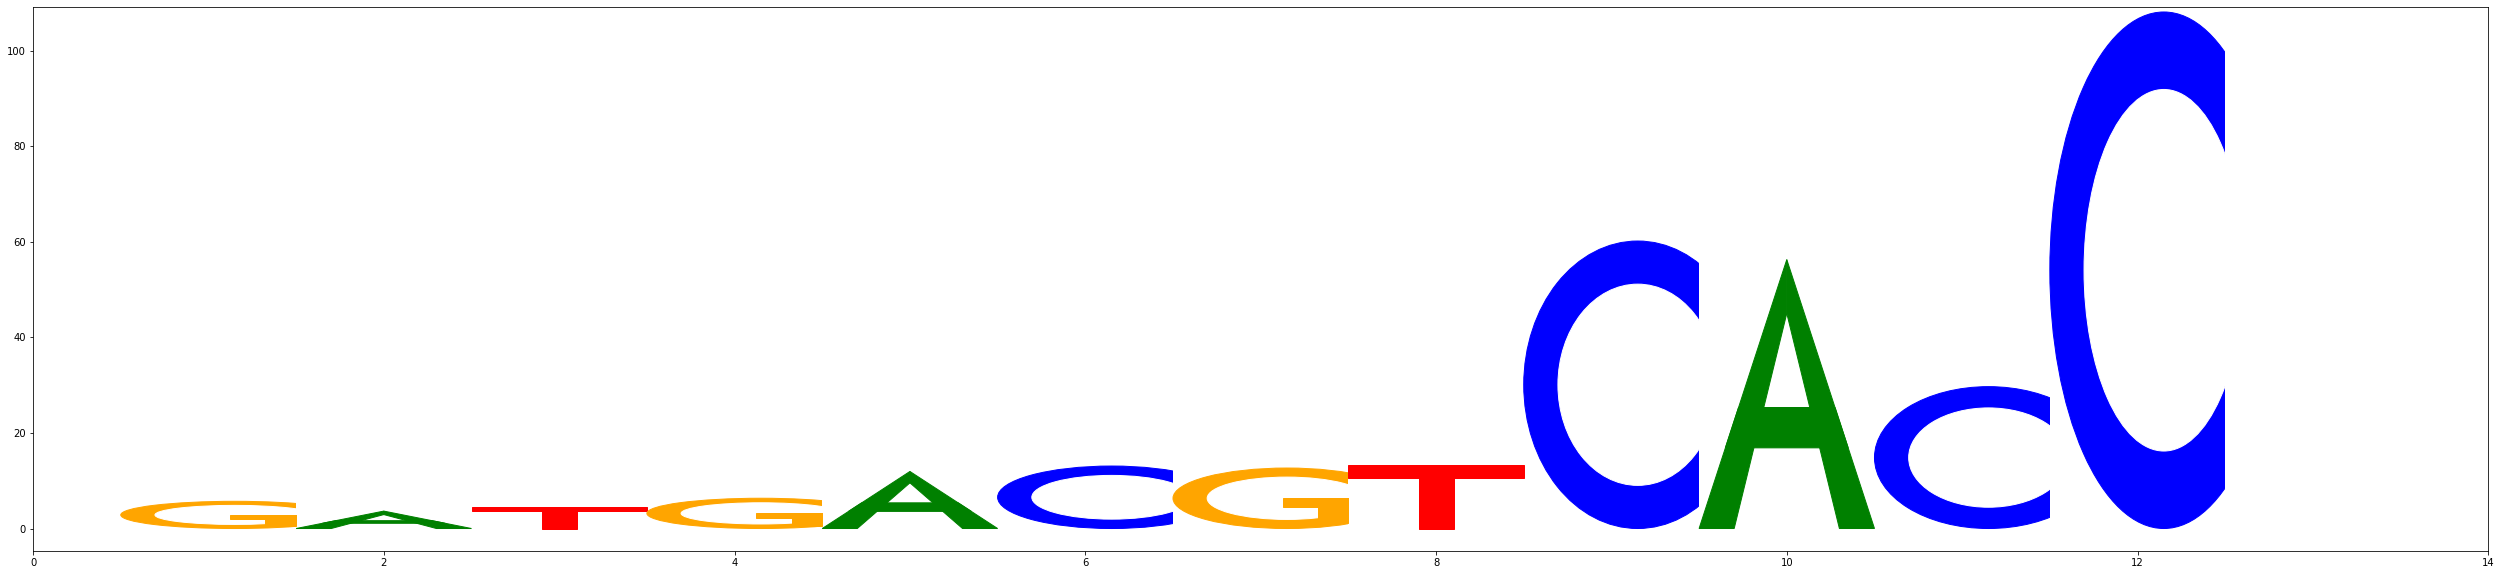

In [33]:
tmpObjPos.plotFea['figSize'] = (44,10)
tmpObjPos.plot_max(valThres=0)